## Introduction to ffn

Data related works in Python are usually done using libraries such as Numpy, Pandas or Scipy, giving that these libraries are not only resourceful and versatile, but they’re well known to the data science community as fundamental Python skills. Having said that, quantitative finance professionals can count on a free open-source library built over the ones mentioned before, which provide straight-forward and easy solutions for finance, check out: [ffn](http://pmorissette.github.io/ffn/)


f.fn() gives a vast array of utilities, from performance measurement and evaluation to graphing and common data transformations.

The easiest way to install ffn is from the Python Package Index using pip:

```pip install ffn```

## Putting it to use
In our workflow, we’ll use ffn for all data retrieval and manipulation, as well as matplotlib for the graphical approach.

In [3]:
import ffn
import matplotlib.pyplot as plt
# Plotting on Jupyter Notebook
%matplotlib inline 
# Control the default size of figures in this Jupyter notebook
%pylab inline 
# Change the size of plots
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


%matplotlib inline is a ‘magic function’ in iPython, called with a command line style syntax. With this back-end, the output of plotting commands is displayed inline within front-ends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. 

Analogously, %pylab inline is used to control the default size of figures in the notebook.

We’ll start using ffn while importing data for analysis. By default, ffn.get function uses Yahoo Finance to gather historical data on securities and futures negotiated in Capital Markets from all over the world. 

We will restrain our analysis example on four companies: Google, Apple, Facebook and Amazon.

In [4]:
# Import prices (adj. close) and define data frame variable
prices = ffn.get('amzn,aapl,googl,fb', start='2018-07-11', end='2019-07-11')

This should give us a data frame containing a ‘date’ indexed column, already in datetime format, along with four other columns, each providing the adjusted closing price of the chosen stocks.

In [5]:
prices.head()

,amzn,aapl,googl,fb
Date,,,,
2018-07-11,1755.000000,45.491234,1171.459961,202.539993
2018-07-12,1796.619995,46.253941,1201.260010,206.919998
2018-07-13,1813.030029,46.326584,1204.420044,207.320007
2018-07-16,1822.489990,46.224888,1196.510010,207.229996
2018-07-17,1843.930054,46.355640,1213.079956,209.990005


As a start, a simple line chart can tell us how all these securities performed over the period.

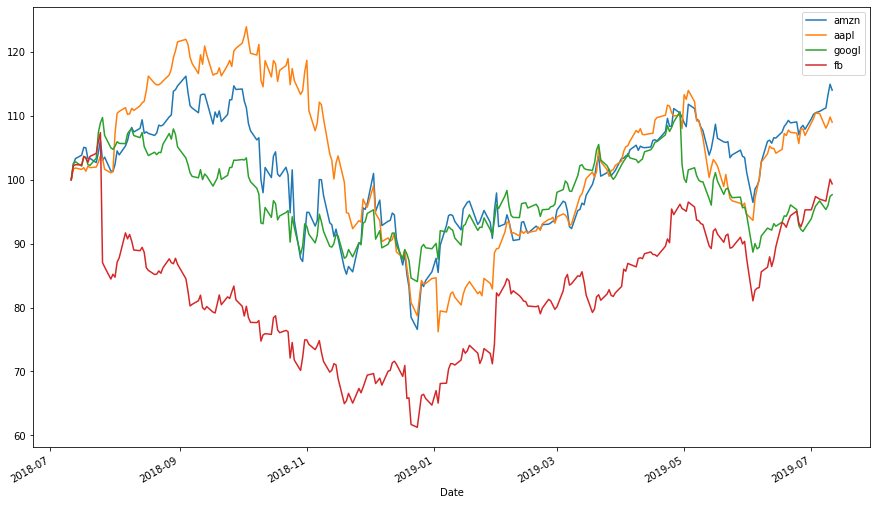

In [6]:
# Relative performance graphically using rebase for a common starting point
ax = prices.rebase().plot()

The .rebase() function allows us to plot the time series from a common starting point, so that we can see how each stock performed relative to each other.

Our next step should be focused on the returns of each security. Tackling frequency distribution, histograms are powerful tools for distinguishing shape, identifying central points, variation, amplitude and symmetry of the returns.

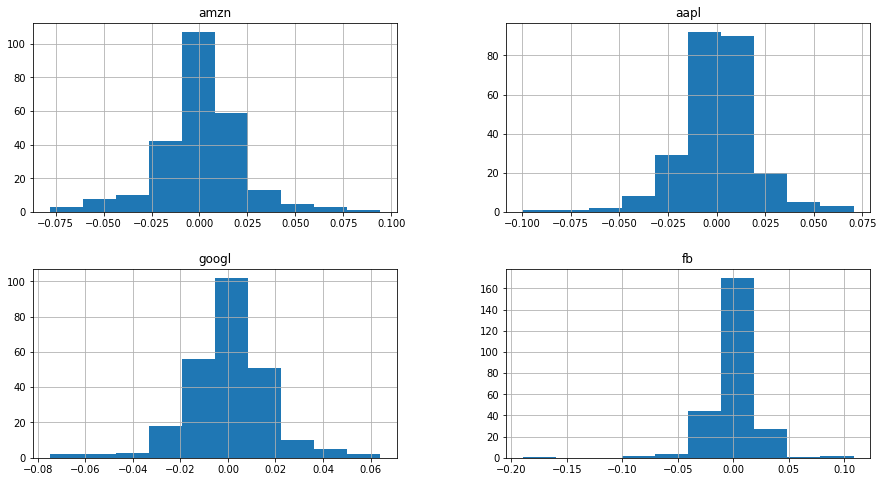

In [7]:
# Returns of each security and plot histogram 
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(15, 8))

Since we’re looking at four companies from the technology sector, naturally, they follow a similar return pattern. This may be verified by finding the correlation between them, which can be observed by plotting a heat map, as follows:

<module 'matplotlib.pyplot' from '/home/nekrasovp/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

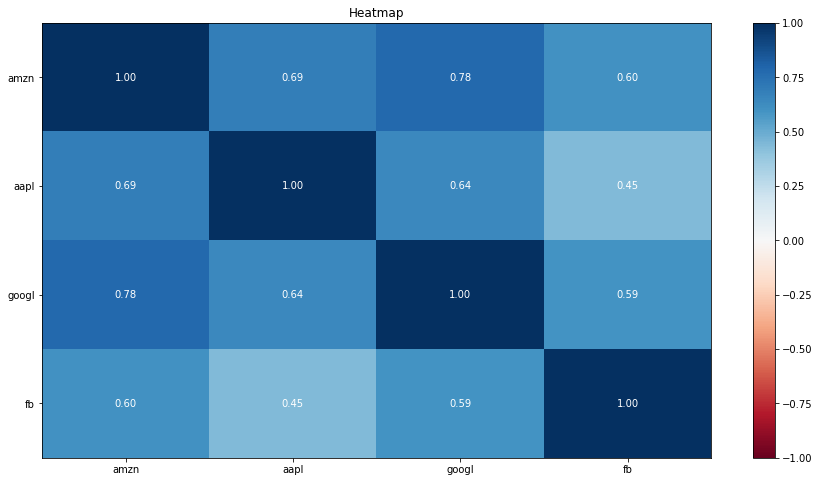

In [8]:
# Finding correlation with a heat map
returns.plot_corr_heatmap()

Now, for ffn’s main performance measurement, we can calculate and display a wide array of statistics using the calc_stats() method.

In [9]:
# Performance metrics
perf = prices.calc_stats()
perf.display();

Stat                 amzn        aapl        googl       fb
-------------------  ----------  ----------  ----------  ----------
Start                2018-07-11  2018-07-11  2018-07-11  2018-07-11
End                  2019-07-11  2019-07-11  2019-07-11  2019-07-11
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         14.02%      9.02%       -2.34%      -0.65%
Daily Sharpe         0.55        0.43        0.05        0.18
Daily Sortino        0.88        0.67        0.07        0.26
CAGR                 14.03%      9.02%       -2.34%      -0.65%
Max Drawdown         -34.10%     -38.52%     -23.40%     -42.96%
Calmar Ratio         0.41        0.23        -0.10       -0.02

MTD                  5.67%       1.94%       5.66%       4.26%
3m                   8.51%       1.80%       -5.42%      13.36%
6m                   21.97%      33.56%      7.48%       39.94%
YTD                  33.23%      28.94%      9.49%       53.51%
1Y                   14.02%      9.0

Although the result interpretation requires a bit of statistical knowledge, this large set of metrics can provide us simple conclusions, such as: Amazon stocks had the best performance between the Big Techs analysed, since, in the given period of the time series (12 months), the company provided a 14.02% return to it’s share-holders. Apple presented a 9.02% return, followed by Google and Facebook’s negative results.
From there, we can also access the underlying performance stats for each series, including monthly returns, drawback charts and more.

## Conclusion

ffn for Python provides a huge set of useful information regarding stock performance in a very simple and straight-forward way. Combining it with matplotlib, we can intuitively detect stock trends or patterns, as well as technically interpret statistical insights to tell a enlightening story.